In [241]:
import numpy as np
import os,sys,inspect
import importlib
%pdb on

# import my functions:
# (1) find the path
dirpath = os.getcwd()
i = 0
while(os.path.basename(dirpath) != "IEMS450_HW") and i <10:
    dirpath = os.path.dirname(dirpath) 
    i = i + 1
targetdir = dirpath + '/HW2/functions'
if targetdir not in sys.path:
    sys.path.insert(0,targetdir)
    
# (2) import
import exercise_4_2 as obj
importlib.reload(obj)

Automatic pdb calling has been turned ON


<module 'exercise_4_2' from '/Users/jingyuanwang/GitHub/IEMS450_HW/HW2/functions/exercise_4_2.py'>

In [307]:
x0 = np.array([0,0.5])
#x0 = np.array([0,-1])

In [308]:
f = obj.f()
m = obj.m(f, x=x0)

In [309]:
d0 = -m.der_x0
#d0 = d0/np.linalg.norm(d0) 

d_newton = np.linalg.solve(m.H_x0, -m.der_x0)
print('Newton step length {}'.format(np.linalg.norm(d_newton)) )
#d1 = d1/np.linalg.norm(d1) 

Newton step length 0.5121969142940493


In [310]:
# steps for different delta
d_k = {}

x0 = np.array([0.2,0.2])
for i, Delta in enumerate( np.arange(0, 2, 0.3)[1:]):
    cons = ({'type': 'ineq', 'fun': lambda x:  -x[0]**2 - x[1]**2 + Delta**2 })
    res=opt.minimize(m.value_step, x0, constraints=cons)
    d_k[i]= res.x

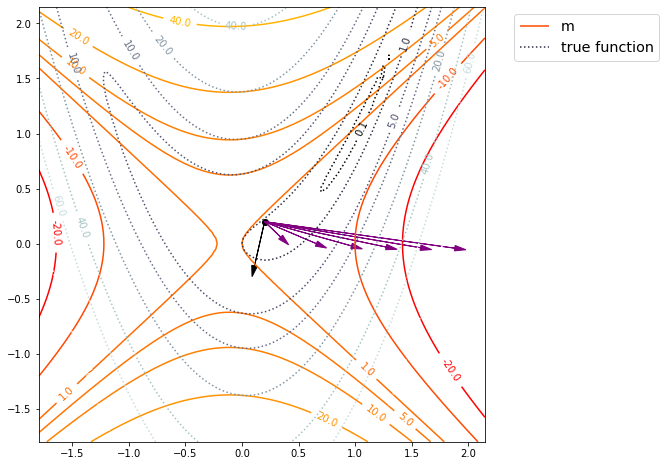

In [312]:
# plot
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.font_manager import FontProperties

x_min = x0[0] - 2
x_max = x0[0] + 2
y_min = x0[1] - 2
y_max = x0[1] + 2

delta = 0.05
x = np.arange(x_min, x_max, delta)
y = np.arange(y_min, y_max, delta)
X, Y = np.meshgrid(x, y)

Z=f.value( (X,Y) )
Z_hat=m.value( X,Y )


fig = plt.figure(figsize=(8,8))

# 1. plot contour
cs = plt.contour(X, Y, Z_hat, levels=[-20,-10,1, 5,10,20,40, 60,100], cmap='autumn'
                , norm=colors.PowerNorm(gamma=1. / 2.))
cs_true = plt.contour(X, Y, Z, levels=[0.1, 1, 5,10,20,40, 60,100], cmap='bone', linestyles='dotted'
                     , norm=colors.PowerNorm(gamma=1. / 3.))
plt.scatter(x0[0], x0[1], color='black' )
#plt.text(x0[0]+0.1, x0[1]-0.1, s='x', fontsize=20 )
# labels
plt.clabel(cs, inline=1, fontsize=10, fmt='%3.1f');
plt.clabel(cs_true, inline=1, fontsize=10, fmt='%3.1f');
cs.collections[1].set_label('m')
cs_true.collections[1].set_label('true function')

# 2. plot newton and steepest descent
d = np.squeeze(d_newton)
plt.arrow( x0[0], x0[1], 
           d[0], d[1], color='black', length_includes_head=True,
          head_width=0.05, head_length=0.1, label='Newton')

#d = np.squeeze(d0)
#plt.arrow( x0[0], x0[1], 
#           d[0], d[1], color='purple', length_includes_head=True,
#          head_width=0.05, head_length=0.1)

for i,d in d_k.items():
    plt.arrow( x0[0], x0[1], 
           d[0], d[1], color='purple', length_includes_head=True,
          head_width=0.05, head_length=0.1)


# legend
fontP = FontProperties()
fontP.set_size('x-large')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP);